## Programming Exercise Background

The following expansion gives an approximation to the exact value of π:

$$\pi(N) = \frac{4}{N}\sum_{i=1}^N\frac{1}{1 + \left(\frac{i - \frac{1}{2}}{N}\right)^2}$$

We can check this by hand like so...

$$\pi(1) = 4\frac{4}{5} = 3.2$$, $$\pi(2) = 4\left(\frac{16}{17}+\frac{16}{25}\right) = 3.162$$

It can be shown that the approximation continues to become more accurate as N is increased.

### Exercises

Note that you must use double-precision variables for ALL floating-point numbers.

### Exercise 1

Write a program in C, C++, Fortran or Java that computes an approximation to π using the above formula for the following values of N: 1, 2, 10, 50, 100, 500. For each value of N, print out the approximate value π(N) and the error err(N). The error is the difference between π(N) and the true value of π, ie err(N) = π(N) − π. As N increases the value of the error should decrease.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [50]:
pi_true = np.pi
print(pi_true)

3.141592653589793


In [51]:
def pi_approx(N):
    summation = 0
    for i in range(N):
        alpha  = (i - 0.5)/N       
        summation = summation + 1 / (1 + alpha**2)
        #print("i = {} and summation = {}".format(i, summation))
 
    result = (4 / N)*summation
    #print("pi approximation = {}".format(result))
        
    return result

In [52]:
pi_approx(5)

3.4950161216478772

In [53]:
def pi_error(N):
    
    pi_err = np.abs(pi_true - pi_approx(N))

    print("The true value of pi = {}, the approxiamtion = {}".format(pi_true, pi_approx(N)))
    print("Thus, the error is = {}".format(pi_err))
    
    return pi_err

pi_error(5)

The true value of pi = 3.141592653589793, the approxiamtion = 3.4950161216478772
Thus, the error is = 0.3534234680580841


0.35342346805808411

In [54]:
N = [1,2,10,50,100,500]
N = [2000, 5000, 10000, 20000]

outputs_list = []
for input in N:
    outputs = pi_approx(input)
    outputs_list.append(pi_error(input))
    print("{} inputs = PI approximation of {}.".format(input, outputs))
    print(pi_error(input))
    

The true value of pi = 3.141592653589793, the approxiamtion = 3.14259242426687
Thus, the error is = 0.0009997706770770165
2000 inputs = PI approximation of 3.14259242426687.
The true value of pi = 3.141592653589793, the approxiamtion = 3.14259242426687
Thus, the error is = 0.0009997706770770165
0.000999770677077
The true value of pi = 3.141592653589793, the approxiamtion = 3.141992616913123
Thus, the error is = 0.00039996332332981055
5000 inputs = PI approximation of 3.141992616913123.
The true value of pi = 3.141592653589793, the approxiamtion = 3.141992616913123
Thus, the error is = 0.00039996332332981055
0.00039996332333
The true value of pi = 3.141592653589793, the approxiamtion = 3.1417926444218836
Thus, the error is = 0.00019999083209043533
10000 inputs = PI approximation of 3.1417926444218836.
The true value of pi = 3.141592653589793, the approxiamtion = 3.1417926444218836
Thus, the error is = 0.00019999083209043533
0.00019999083209
The true value of pi = 3.141592653589793, the 

In [55]:
N
outputs_list

[0.0009997706770770165,
 0.00039996332332981055,
 0.00019999083209043533,
 9.9997708175703082e-05]

/Users/tarek_allam/anaconda/envs/py3/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


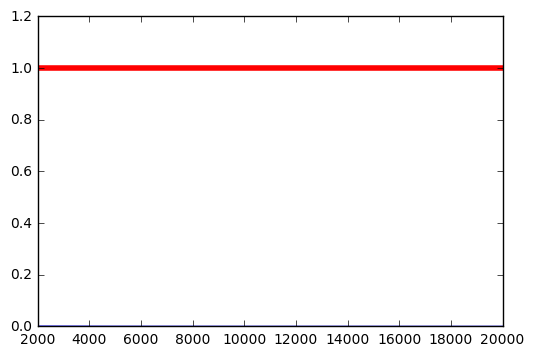

In [56]:
plt.plot(N,outputs_list)
plt.axhline(y=1, linewidth=4, color='r')

In [57]:
0.000001

1e-06

### Exercise 2

We now want to find out the minimum value of N that is required to give a value for π(N) that is accurate to some specified value. We will call this value Nmin. By computing π(N) for increasing values of N, calculate Nmin such that err(Nmin) < 10−6

In [61]:
#N = [1,2,10,50,100,500]
#N = [2000, 5000, 10000, 20000]

#outputs_list = []

for input in range(500, 500, 200000):
    #outputs = pi_approx(input)
    
    if pi_error(input) < 0.000001:
        print("Got 'eeeem at {}".format(input))
        break
    else:
        print("Where they at doh?")
    #outputs_list.append(pi_error(input))
    #print("{} inputs = PI approximation of {}.".format(input, outputs))
    #print(pi_error(input))
    

### Exercise 3

This way of computing Nmin is clearly inefficient. For example, if we require err(Nmin) < 10−6. and we calculate err(2) = 0.02, it is a waste of time to calculate err(3) as it is already obvious that Nmin is very much larger than 2!   Rewrite your program so that is uses a more efficient way to locate the minimum value of N. Your new method must produce exactly the same value for Nmin as before but should be faster. For example, you might try and reduce the number of times that you have to evaluate err(N). You should also tell us how much faster your new program is.